In [60]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce

In [62]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)  

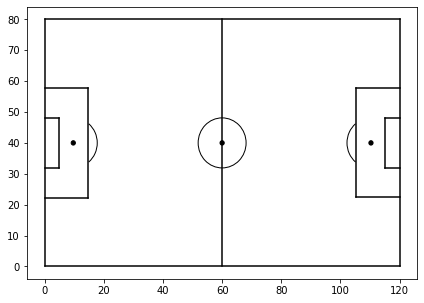

In [63]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [64]:
with open('./7567.json') as x:
   data = json.load(x)

In [65]:
df = json_normalize(data, sep = "_")
ozil_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Mesut Özil')] # get passing information of Ozil
pass_column = [i for i in df.columns if i.startswith("pass")]
ozil_pass = ozil_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
ozil_pass.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,period,timestamp,location,pass_end_location,pass_recipient_name
4,ee674161-e20e-42a3-a045-235673ba58c9,1,00:00:00.187,"[61.0, 41.0]","[49.0, 35.0]",Toni Kroos
12,91f09706-1eec-42f1-96cb-190ac7ae53f5,1,00:00:04.200,"[55.0, 43.0]","[37.0, 59.0]",Niklas Süle
145,abfc6d78-f879-4498-bbdf-046d6b8e4dde,1,00:02:53.600,"[65.0, 23.0]","[71.0, 27.0]",Marco Reus
168,f08412b3-88af-4f50-b7d8-37e13bd21192,1,00:03:03.517,"[60.0, 25.0]","[56.0, 38.0]",Sami Khedira
187,5c4919f5-f081-4ab0-81ec-6e585de19a2e,1,00:03:15.080,"[67.0, 45.0]","[56.0, 32.0]",Toni Kroos


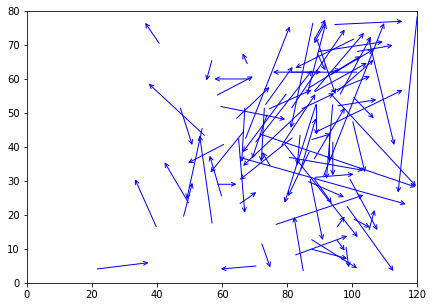

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
for i in range(len(ozil_pass)):
    # can also differentiate by color
    color = "blue" if ozil_pass.iloc[i]['period'] == 1 else "red"
    ax.annotate("", xy = (ozil_pass.iloc[i]['pass_end_location'][0], ozil_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (ozil_pass.iloc[i]['location'][0], ozil_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

In [67]:
ozil_action = df[(df['player_name']=='Mesut Özil')][["id", "type_name","period", "timestamp", "location"]]
ozil_action.head()

,id,type_name,period,timestamp,location
4,ee674161-e20e-42a3-a045-235673ba58c9,Pass,1,00:00:00.187,"[61.0, 41.0]"
10,e9cd096f-d810-4062-9fcb-1e047e68ab0f,Ball Receipt*,1,00:00:02.960,"[58.0, 42.0]"
11,2a11a42d-e250-4150-bde9-6bdbc0164a9c,Carry,1,00:00:02.960,"[58.0, 42.0]"
12,91f09706-1eec-42f1-96cb-190ac7ae53f5,Pass,1,00:00:04.200,"[55.0, 43.0]"
79,b73c7c98-6ead-4813-a2d1-8aa6be8bdbc0,Interception,1,00:01:36.080,"[12.0, 28.0]"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


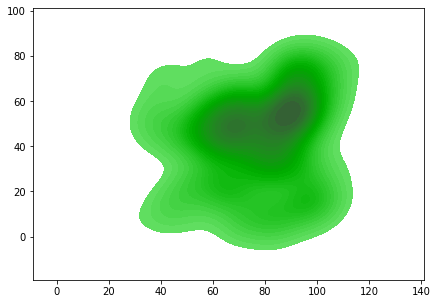

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

x_coord = [i[0] for i in ozil_action["location"]]
y_coord = [i[1] for i in ozil_action["location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

In [69]:
def heat_pass_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "blue" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


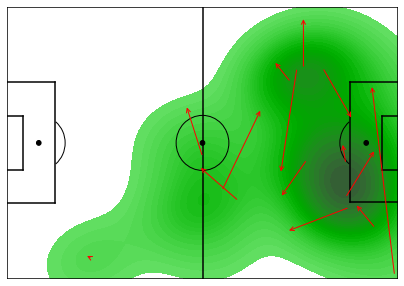

In [70]:
heat_pass_map(df, 'Thomas Müller')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


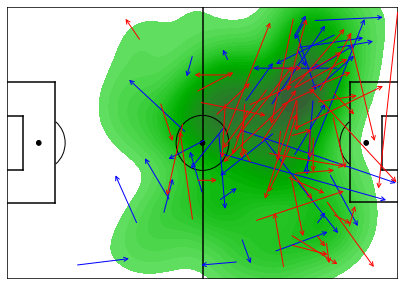

In [71]:
heat_pass_map(df, 'Mesut Özil')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


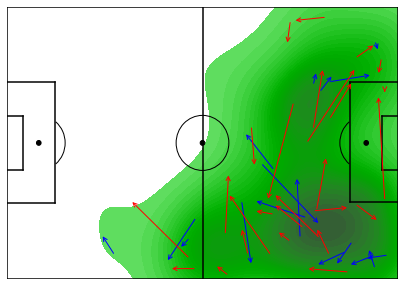

In [72]:
heat_pass_map(df, 'Marco Reus')

In [73]:
data_id = [7546, 7563, 8655, 8658, 7530, 7580, 8649]
# consequently read the json and concatenate into a pre-defined dataframe
all_france = pd.DataFrame()
for i in data_id:
    with open('./'+str(i)+'.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_france.empty:
        all_france = df
    else:
        all_france = pd.concat([all_france, df], join = 'outer', sort = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


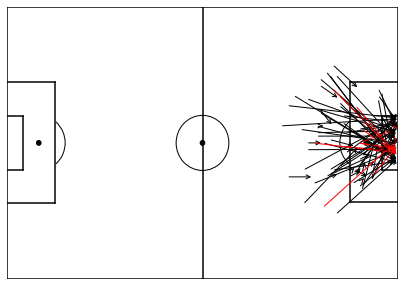

In [74]:
shot_data = all_france[(all_france['type_name'] == "Shot") & (all_france['team_name'] == 'France')]

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

for i in range(len(shot_data)):
    # can also differentiate different half by different color
    color = "red" if shot_data.iloc[i]['shot_outcome_name'] == "Goal" else "black"
    ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
           xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
           arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

In [75]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

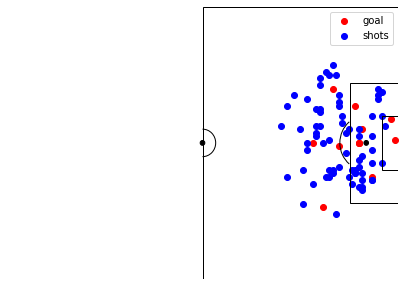

In [76]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_half_pitch(ax)
plt.axis('off')
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal')
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shots')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


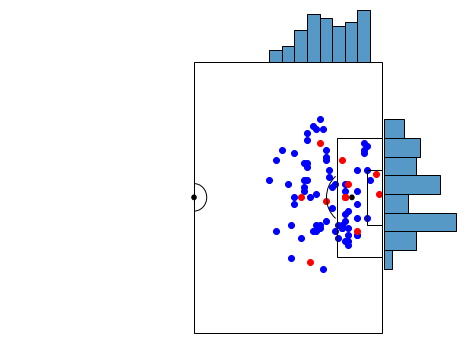

In [77]:
joint_shot_chart = sns.jointplot(x_coord, y_coord, kind='scatter', space=0, alpha=0.5)
joint_shot_chart.fig.set_size_inches(7,5)
ax = joint_shot_chart.ax_joint
# overlaying the plot with a pitch
draw_half_pitch(ax)
ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
joint_shot_chart.ax_marg_x.set_axis_off()
ax.set_axis_off()
plt.ylim(-.5, 80)
plt.axis('off')
plt.show()

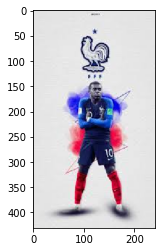

In [78]:
france = plt.imread("/content/mbappe.png")
plt.imshow(france)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


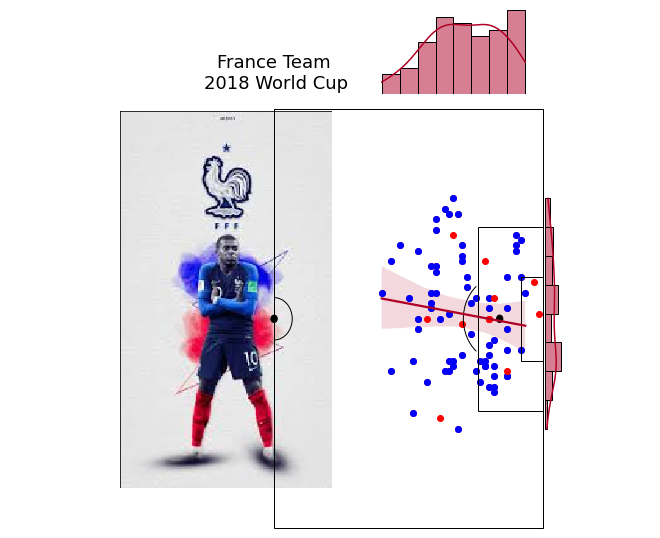

In [79]:
from matplotlib.offsetbox import  OffsetImage
cmap=plt.cm.YlOrRd_r # import cmap
joint_shot_chart = sns.jointplot(x_coord, y_coord,
                                 kind='reg', space=0, color = cmap(0.1))
joint_shot_chart.fig.set_size_inches(10,8)
ax = joint_shot_chart.ax_joint
draw_half_pitch(ax)
ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('France Team \n2018 World Cup', 
             y=1.2, fontsize=18)
joint_shot_chart.ax_marg_x.set_axis_off()
joint_shot_chart.ax_marg_y.set_axis_off()
img = OffsetImage(france, zoom=0.873)
img.set_offset((120,50)) # play around with the coordinate until I found a good place
# add the image
ax.add_artist(img)
ax.set_axis_off()
plt.xlim(0,123)
plt.ylim(-.5, 83)
plt.axis('off')
plt.show()

In [80]:
data_id = [7567, 7534, 7551]
# consequently read the json and concatenate into a pre-defined dataframe
germany_all = pd.DataFrame()
for i in data_id:
    with open('./'+str(i)+'.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_france.empty:
        germany_all = df
    else:
        germany_all = pd.concat([germany_all, df], join = 'outer', sort = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [81]:
germany_all = germany_all[germany_all.team_name == "Germany"]

In [82]:
total_dribble = germany_all.groupby('player_name')['type_name'].apply(lambda x:(x=='Dribble').sum()).reset_index(name='total_dribble')
# number of dribble completed
dribble_complete= germany_all.groupby('player_name')['dribble_outcome_name'].apply(lambda x: (x=='Complete').sum()).reset_index(name='dribble_completed')
# total number of pass
total_pass = germany_all.groupby('player_name')['type_name'].apply(lambda x: (x=='Pass').sum()).reset_index(name='total_pass')
# number of incomplete pass
pass_incomplete = germany_all.groupby('player_name')['pass_outcome_name'].count().reset_index(name='incomplete_pass')
# number of times being dispossessed
dispossessed = germany_all.groupby('player_name')['type_name'].apply(lambda x: (x=='Dispossessed').sum()).reset_index(name='dispossessed')

In [83]:
df_list = [total_dribble, dribble_complete, total_pass, pass_incomplete, dispossessed]
summary_data = reduce(lambda x, y: pd.merge(x, y, on = 'player_name'), df_list)
summary_data

,player_name,total_dribble,dribble_completed,total_pass,incomplete_pass,dispossessed
0,Antonio Rüdiger,0,0,86,6,1
1,Jonas Hector,2,1,107,16,0
2,Joshua Kimmich,2,1,265,47,0
3,Julian Brandt,3,1,25,2,0
4,Julian Draxler,7,5,81,9,2
5,Jérôme Boateng,0,0,184,22,2
6,Leon Goretzka,1,1,22,2,0
7,Manuel Neuer,2,1,79,11,0
8,Marco Reus,2,1,126,23,1
9,Mario Gómez García,0,0,13,6,0


In [84]:
import matplotlib

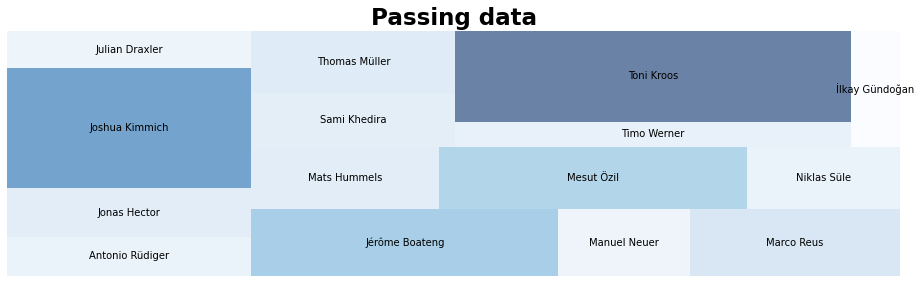

In [85]:
dataPass= summary_data[summary_data["total_pass"]>50]

#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(dataPass.total_pass), vmax=max(dataPass.total_pass))
colors = [matplotlib.cm.Blues(norm(value)) for value in dataPass.total_pass]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=dataPass.player_name,sizes=dataPass.total_pass, color = colors, alpha=.6)
plt.title("Passing data",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

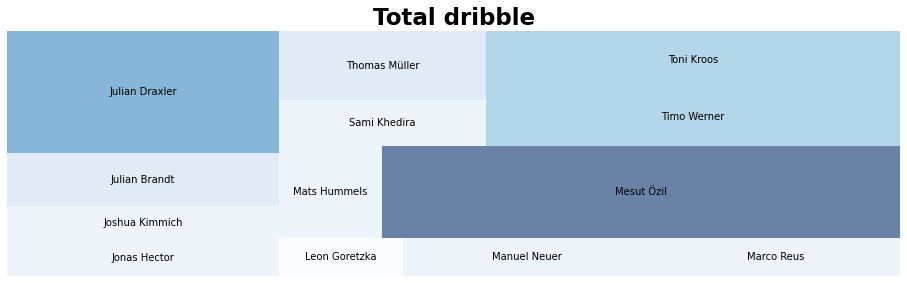

In [86]:
dataDribble= summary_data[summary_data["total_dribble"]>0]
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(dataDribble.total_dribble), vmax=max(dataDribble.total_dribble))
colors = [matplotlib.cm.Blues(norm(value)) for value in dataDribble.total_dribble]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=dataDribble.player_name,sizes=dataDribble.total_dribble, color = colors, alpha=.6)
plt.title("Total dribble",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()